#PDF Malware Detection Using Machine Learning

##Abstract:
This notebook demonstrates a machine learning approach to detecting malware in PDF files. It covers data loading, preprocessing, feature extraction, model training, and evaluation.

##Introduction:
The goal of this project is to build a classifier that can distinguish between benign and malicious PDF files. This is achieved through a combination of feature extraction and supervised learning techniques.

1. **Define Packages and Load Data**:
   - Import necessary libraries and load the  dataset.

2. **Data Preprocessing**:
   - Perform visualization to gain insights into the data.
   - Split the data into training and testing sets.

3. **Model Evaluation**:
   - Evaluate the performance of different machine learning algorithms.
   - Evaluate the performance of the deep neural network model.

4. **Comparison**:
   - Compare the performance metrics of various machine learning algorithms and the deep neural network to determine the most effective approach for breast cancer classification.



#Step 1: Define Packages and Load Data

###The following code imports key libraries for data analysis and visualization. Pandas handles data manipulation, Matplotlib and Seaborn create various types of plots, and NumPy supports numerical operations and array handling.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as na


##Load Data

### This line of code reads a CSV file named "main.csv" into a DataFrame called `df`, using the value in the 32nd column as the index for the DataFrame.

In [4]:
df = pd.read_csv('Final.csv')

In [5]:
df.shape

(18126, 34)

#Step 2:Data preproccesing

### As part of the data processing, the next step involves identifying missing values in the dataset. The following code will print the number of missing values in each column of the DataFrame df, helping to pinpoint any columns with incomplete data.

In [6]:
df.isnull().sum()

name                0
pdf_size            0
metadata_size       0
pages               0
xref_length         0
title_characters    0
isEncrypted         0
embedded_files      0
images              0
contains_text       0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
URI                 0
Colors              0
class               0
dtype: int64

### The next steps involve renaming and restructuring columns as well as examining the data types. The code will rename the 'class' column to 'Label' and then drop the original 'class' column.

In [7]:
# Rename 'Diagnosis' column to 'Label'
df['Label'] = df['class']
df = df.drop(columns=['class'])

# Print data types of columns
print(df.dtypes)


name                 object
pdf_size            float64
metadata_size       float64
pages               float64
xref_length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
images              float64
contains_text        object
header               object
obj                 float64
endobj              float64
stream              float64
endstream           float64
xref                float64
trailer             float64
startxref           float64
pageno              float64
encrypt             float64
ObjStm              float64
JS                  float64
Javascript          float64
AA                  float64
OpenAction          float64
Acroform            float64
JBIG2Decode         float64
RichMedia           float64
launch              float64
EmbeddedFile        float64
XFA                 float64
URI                 float64
Colors              float64
Label                object
dtype: object


##Visualization
###To better understand the distribution of the target labels, a count plot can be created using Seaborn. This visualization will show the frequency of each class in the 'Label' column. This simple snippet will enhance the visual appeal of the data analysis and provide clear insights into the class distribution.

<Axes: xlabel='Label', ylabel='count'>

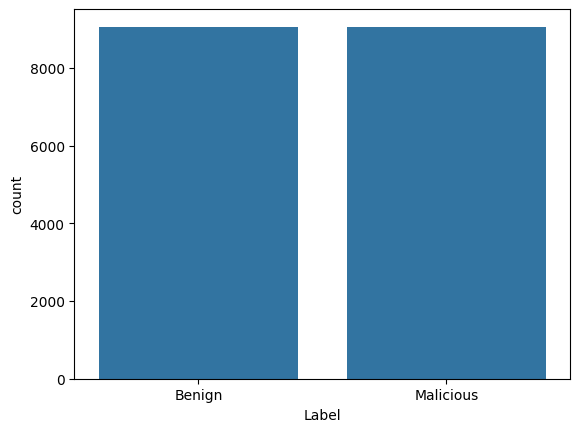

In [8]:
#Understand the data
sns.countplot(x="Label", data=df)

###To proceed with the data preprocessing, categorical values need to be converted into numerical values. The following steps will achieve this:



1.   Define the dependent variable y that contains the labels to be predicted.
Print the unique labels before encoding to show their original categorical form.

2.   Encode the categorical labels  into numerical values (0 and 1) using LabelEncoder from Scikit-learn.




In [9]:
# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(df["Label"].values)
df['contains_text']= labelencoder.fit_transform(df["contains_text"])
df["header"] = labelencoder.fit_transform(df["header"])
df["name"] = labelencoder.fit_transform(df["name"])

In [10]:
df.dtypes


name                  int64
pdf_size            float64
metadata_size       float64
pages               float64
xref_length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
images              float64
contains_text         int64
header                int64
obj                 float64
endobj              float64
stream              float64
endstream           float64
xref                float64
trailer             float64
startxref           float64
pageno              float64
encrypt             float64
ObjStm              float64
JS                  float64
Javascript          float64
AA                  float64
OpenAction          float64
Acroform            float64
JBIG2Decode         float64
RichMedia           float64
launch              float64
EmbeddedFile        float64
XFA                 float64
URI                 float64
Colors              float64
Label                object
dtype: object

### Define the independent variables X, excluding the 'Label' column.


In [11]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label"], axis=1)
print(X.describe().T) #Needs scaling

                    count         mean           std    min      25%     50%  \
name              18126.0  9062.500000   5232.669825    0.0  4531.25  9062.5   
pdf_size          18126.0    64.396557    197.068774    0.0     9.00    20.0   
metadata_size     18126.0   305.833554   1047.491822  180.0   180.00   262.0   
pages             18126.0     3.659384      8.164796    0.0     1.00     1.0   
xref_length       18126.0  3005.269282  18186.688574    3.0    10.00    21.0   
title_characters  18126.0    32.689617    843.323473    0.0     0.00     0.0   
isEncrypted       18126.0     0.004414      0.066290    0.0     0.00     0.0   
embedded_files    18126.0     0.014344      0.145227    0.0     0.00     0.0   
images            18126.0    -0.953492      0.210588   -1.0    -1.00    -1.0   
contains_text     18126.0     0.415646      0.492847    0.0     0.00     0.0   
header            18126.0     4.925246      1.713262    0.0     4.00     4.0   
obj               18126.0    51.892309  

###To ensure consistency in the range of values across independent variables, the following steps will be taken



*   Import the MinMaxScaler from Scikit-learn to scale or normalize the data.


*   Fit the scaler to the independent variables X.
*   Transform the independent variables using the fitted scaler to bring them to a similar range.


In [12]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[2.64165517e-01 2.60254597e-03 3.07366824e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.20524138e-01 4.24328147e-03 1.83621739e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.08386207e-01 9.61810467e-04 2.35514839e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.73958621e-01 1.13154173e-04 8.38273157e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.10206897e-02 1.13154173e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.76413793e-02 1.13154173e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


##Spliting Data
###To verify the accuracy of the model after fitting, the dataset will be split into training and testing sets.

In [13]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (13594, 33)
Shape of testing data is:  (4532, 33)


#Step 3:Model Evaluation

##Machine Learning Models
###Next step to defines a function called `models`, which is intended to train various classifiers and evaluate their performance on a breast cancer classification task. The classifiers include Logistic Regression, K Nearest Neighbor, Decision Tree Classifier, Gaussian Naive Bayes, Random Forest Classifier, and Support Vector Machine (Linear Classifier). After training, each classifier will be tested on the test data to calculate performance metrics such as accuracy, precision, recall, and F1 score. The confusion matrix for each classifier will also be plotted as a heatmap for visual assessment of classification results. This comprehensive analysis aims to aid in selecting the most suitable model for the given dataset.

[0] Logistic Regression Training Accuracy: 0.94
[1] K Nearest Neighbor Training Accuracy: 0.99
[2] Decision Tree Classifier Training Accuracy: 1.00
[3] Gaussian Naive Bayes Training Accuracy: 0.90
[4] Random Forest Classifier Training Accuracy: 1.00
[5] Support Vector Machine (Linear Classifier) Training Accuracy: 0.96
Confusion Matrix for Logistic Regression:
[[2126  130]
 [ 155 2121]]
Logistic Regression Testing Accuracy = 0.9371
Logistic Regression Precision = 0.9422
Logistic Regression Recall = 0.9319
Logistic Regression F1 Score = 0.9370



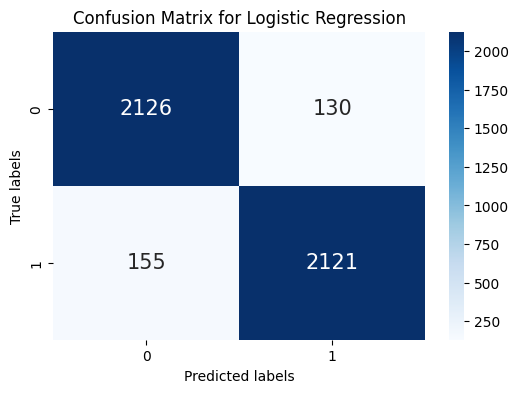

Confusion Matrix for K Nearest Neighbor:
[[2239   17]
 [  61 2215]]
K Nearest Neighbor Testing Accuracy = 0.9828
K Nearest Neighbor Precision = 0.9924
K Nearest Neighbor Recall = 0.9732
K Nearest Neighbor F1 Score = 0.9827



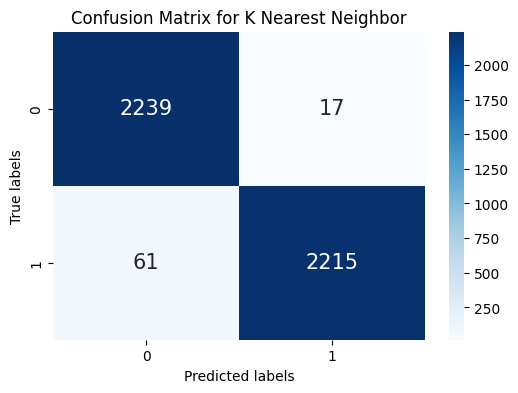

Confusion Matrix for Decision Tree Classifier:
[[2246   10]
 [  14 2262]]
Decision Tree Classifier Testing Accuracy = 0.9947
Decision Tree Classifier Precision = 0.9956
Decision Tree Classifier Recall = 0.9938
Decision Tree Classifier F1 Score = 0.9947



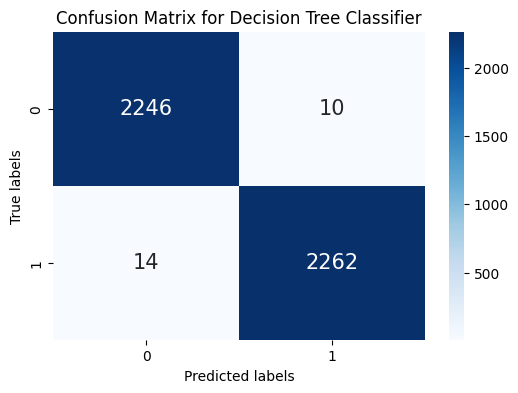

Confusion Matrix for Gaussian Naive Bayes:
[[2249    7]
 [ 450 1826]]
Gaussian Naive Bayes Testing Accuracy = 0.8992
Gaussian Naive Bayes Precision = 0.9962
Gaussian Naive Bayes Recall = 0.8023
Gaussian Naive Bayes F1 Score = 0.8888



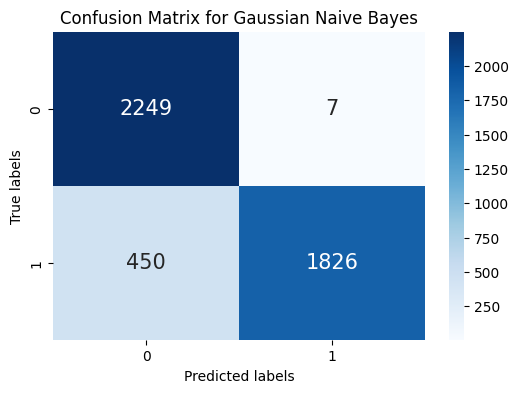

Confusion Matrix for Random Forest Classifier:
[[2252    4]
 [   8 2268]]
Random Forest Classifier Testing Accuracy = 0.9974
Random Forest Classifier Precision = 0.9982
Random Forest Classifier Recall = 0.9965
Random Forest Classifier F1 Score = 0.9974



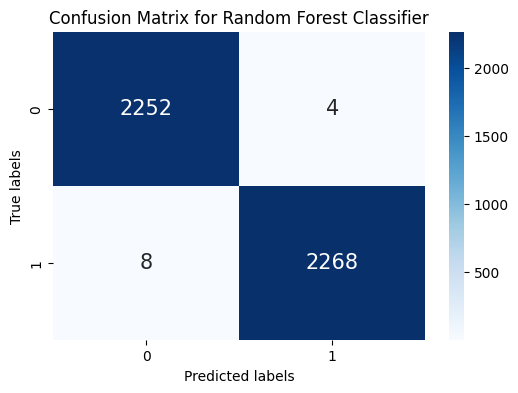

Confusion Matrix for Support Vector Machine (Linear Classifier):
[[2179   77]
 [ 135 2141]]
Support Vector Machine (Linear Classifier) Testing Accuracy = 0.9532
Support Vector Machine (Linear Classifier) Precision = 0.9653
Support Vector Machine (Linear Classifier) Recall = 0.9407
Support Vector Machine (Linear Classifier) F1 Score = 0.9528



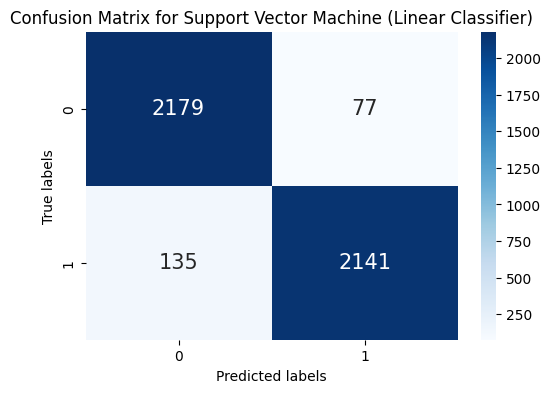

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score

def models(X_train, y_train):
    # Import necessary libraries for different classifiers
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC

    # Initialize all models with their respective hyperparameters
    log = LogisticRegression(random_state=0)
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    gauss = GaussianNB()
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    svc_lin = SVC(kernel='linear', random_state=0)

    # List of all models
    models = [log, knn, tree, gauss, forest, svc_lin]
    # Corresponding names of the models
    model_names = [
        'Logistic Regression',
        'K Nearest Neighbor',
        'Decision Tree Classifier',
        'Gaussian Naive Bayes',
        'Random Forest Classifier',
        'Support Vector Machine (Linear Classifier)'
    ]

    # Train each model using the training data
    for model in models:
        model.fit(X_train, y_train)

    # Print the training accuracy for each model
    for i, model in enumerate(models):
        print(f'[{i}] {model_names[i]} Training Accuracy: {model.score(X_train, y_train):.2f}')

    return models, model_names

# Ensure that mdl and model_names are correctly retrieved by calling the models function
mdl, model_names = models(X_train, y_train)

# Test each model and print the results
for i, model in enumerate(mdl):
    try:
        # Predict the test set results
        y_pred = model.predict(X_test)

        # Calculate the confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        # Calculate recall score
        recall = recall_score(y_test, y_pred, average='binary', zero_division=0)
        # Calculate precision score
        precision = precision_score(y_test, y_pred, average='binary', zero_division=0)
        # Calculate F1 score
        f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)

        # Calculate accuracy
        accuracy = (cm[0][0] + cm[1][1]) / cm.sum()

        # Print the confusion matrix and other metrics
        print(f'Confusion Matrix for {model_names[i]}:')
        print(cm)
        print(f'{model_names[i]} Testing Accuracy = {accuracy:.4f}')
        print(f'{model_names[i]} Precision = {precision:.4f}')
        print(f'{model_names[i]} Recall = {recall:.4f}')
        print(f'{model_names[i]} F1 Score = {f1:.4f}')
        print()  # Print a new line for better readability

        # Plot the heatmap of the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 15})
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title(f'Confusion Matrix for {model_names[i]}')
        plt.show()

    except Exception as e:
        # Print any errors encountered during the process
        print(f'Error with {model_names[i]} - Model[{i}]: {e}')


##Deep Learning Models



###Imports necessary modules from Keras to build a neural network model.

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

### Create model consists of two fully connected layers (Dense) with Rectified Linear Unit (ReLU) activation function, followed by a dropout layer to prevent overfitting. The output layer consists of a single neuron with a sigmoid activation function, suitable for binary classification tasks. The model is compiled with binary cross-entropy loss function and the Adam optimizer.

In [16]:
model = Sequential()
model.add(Dense(66, input_dim=33, activation='relu'))
model.add(Dense(14, input_dim=66, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 66)                2244      
                                                                 
 dense_1 (Dense)             (None, 14)                938       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 15        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 3197 (12.49 KB)
Trainable params: 3197 (12.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=40,
                    validation_data=(X_test, y_test))


Epoch 1/100
340/340 [==============================] - 5s 5ms/step - loss: 0.3746 - accuracy: 0.8427 - val_loss: 0.1679 - val_accuracy: 0.9345
Epoch 2/100
340/340 [==============================] - 2s 6ms/step - loss: 0.1614 - accuracy: 0.9409 - val_loss: 0.1137 - val_accuracy: 0.9570
Epoch 3/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1280 - accuracy: 0.9601 - val_loss: 0.0990 - val_accuracy: 0.9671
Epoch 4/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1132 - accuracy: 0.9686 - val_loss: 0.0939 - val_accuracy: 0.9702
Epoch 5/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1005 - accuracy: 0.9737 - val_loss: 0.0826 - val_accuracy: 0.9779
Epoch 6/100
340/340 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.9761 - val_loss: 0.0752 - val_accuracy: 0.9819
Epoch 7/100
340/340 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9793 - val_loss: 0.0703 - val_accuracy: 0.9821

###Plots the training and validation accuracy and loss  of model training.

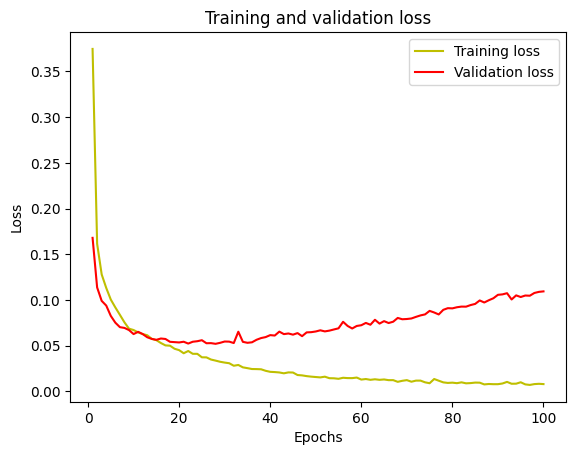

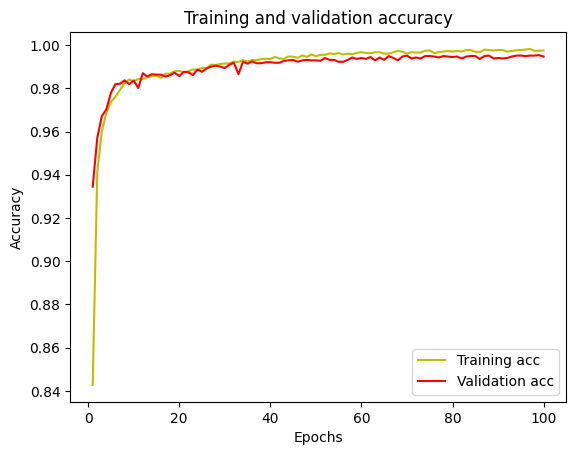

In [18]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

142/142 [==============================] - 0s 1ms/step


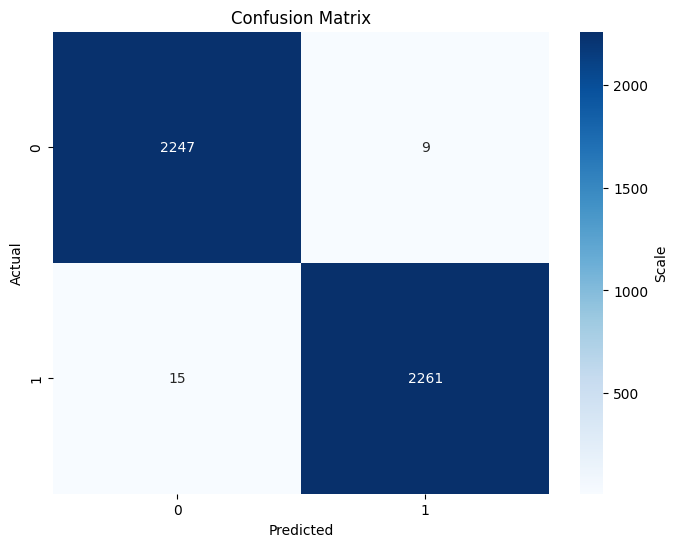

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Scale'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
